<a href="https://colab.research.google.com/github/Estibenjcp/Machine-Learning-BootCamp/blob/main/Tarea_4_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Aprendizaje supervisado - Classification Model

---




About the Dataset

Pregnancies :- Number of times a woman has been pregnant

Glucose :- Plasma Glucose concentration of 2 hours in an oral glucose tolerance test

BloodPressure :- Diastollic Blood Pressure (mm hg)

SkinThickness :- Triceps skin fold thickness(mm)

Insulin :- 2 hour serum insulin(mu U/ml)

BMI :- Body Mass Index ((weight in kg/height in m)^2)

Age :- Age(years)

DiabetesPedigreeFunction :-scores likelihood of diabetes based on family history)

Outcome :- 0(doesn't have diabetes) or 1 (has diabetes)

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,roc_curve
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier
from sklearn.metrics import roc_auc_score, RocCurveDisplay, classification_report, precision_score, recall_score, accuracy_score, confusion_matrix, ConfusionMatrixDisplay, RocCurveDisplay

In [ ]:
from google.colab import drive
drive.mount('content/')

Drive already mounted at content/; to attempt to forcibly remount, call drive.mount("content/", force_remount=True).


# Extract

In [ ]:
# Extraer la data, dataset diabetes.csv

In [ ]:
diabetes=pd.read_csv('/content/content/MyDrive/Tarea Semana 4/diabetes.csv')

In [ ]:
# Explore y entienda su dataset con los diferentes metodos de Pandas

In [ ]:
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
diabetes.shape

(768, 9)

In [ ]:
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
# Identifique valores, duplicados, nulos, etc.

In [ ]:
diabetes.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [ ]:
diabetes.duplicated().sum()

0

In [ ]:
diabetes.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [ ]:
# Elimine las columnas que no aporten valor a nuestro analisis

In [ ]:
diabetes.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


In [ ]:
# Haga las imputaciones de lugar en las columnas que lo requieran, utilice el metodo estadistico que mas convenga

In [ ]:
(diabetes==0).sum()

Pregnancies                 111
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                     500
dtype: int64

In [ ]:
imputer = SimpleImputer(missing_values=0, strategy='median')


In [ ]:
columnas=['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

In [ ]:
diabetes[columnas]=imputer.fit_transform(diabetes[columnas])

In [ ]:
diabetes.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.656250,72.386719,29.108073,140.671875,32.455208,0.471876,33.240885,0.348958
std,3.369578,30.438286,12.096642,8.791221,86.383060,6.875177,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,25.000000,121.500000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,29.000000,125.000000,32.300000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [ ]:
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,125.0,33.6,0.627,50,1
1,1,85.0,66.0,29.0,125.0,26.6,0.351,31,0
2,8,183.0,64.0,29.0,125.0,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1


In [ ]:
scaler = StandardScaler()


In [ ]:
diabetes[columnas]=scaler.fit_transform(diabetes[columnas])

In [ ]:
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,0.866045,-0.031990,0.670643,-0.181541,0.166619,0.627,50,1
1,1,-1.205066,-0.528319,-0.012301,-0.181541,-0.852200,0.351,31,0
2,8,2.016662,-0.693761,-0.012301,-0.181541,-1.332500,0.672,32,1
3,1,-1.073567,-0.528319,-0.695245,-0.540642,-0.633881,0.167,21,0
4,0,0.504422,-2.679076,0.670643,0.316566,1.549303,2.288,33,1


In [ ]:
# Haga visualizaciones de la data incluyendo heatmap para ver la relacion de las caracteristicas del dataset

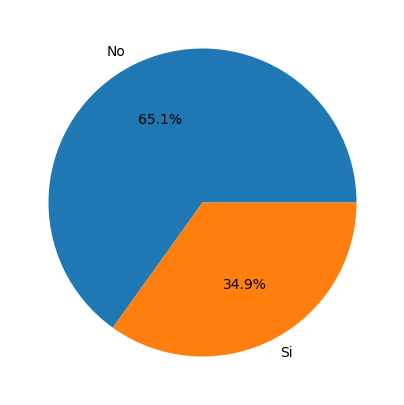

In [ ]:
plt.figure(figsize=(5, 5))
plt.pie(diabetes['Outcome'].value_counts(), labels = ['No','Si'], autopct='%1.1f%%')
plt.show()

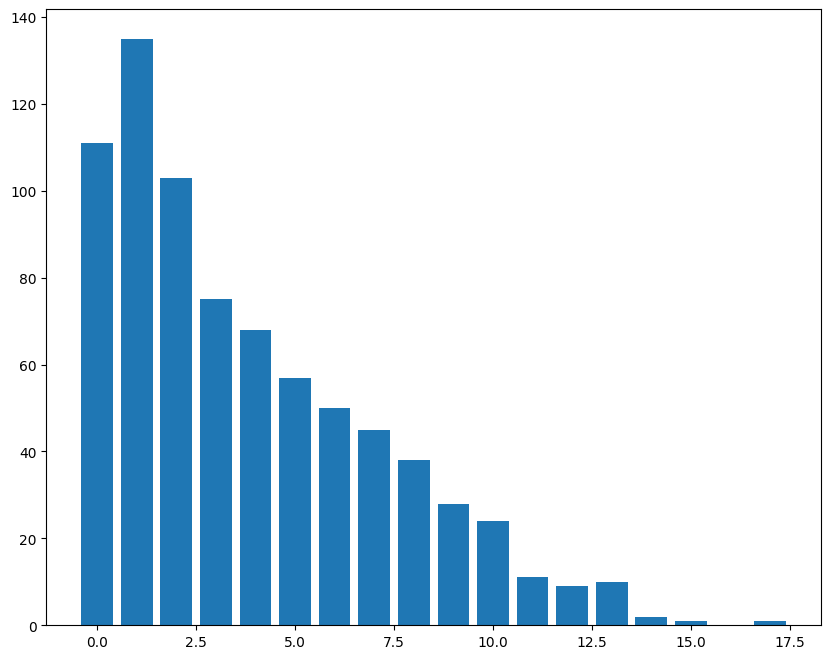

In [ ]:
plt.figure(figsize=(10,8))
plt.bar(diabetes['Pregnancies'].value_counts().index, diabetes['Pregnancies'].value_counts().values)
plt.show()

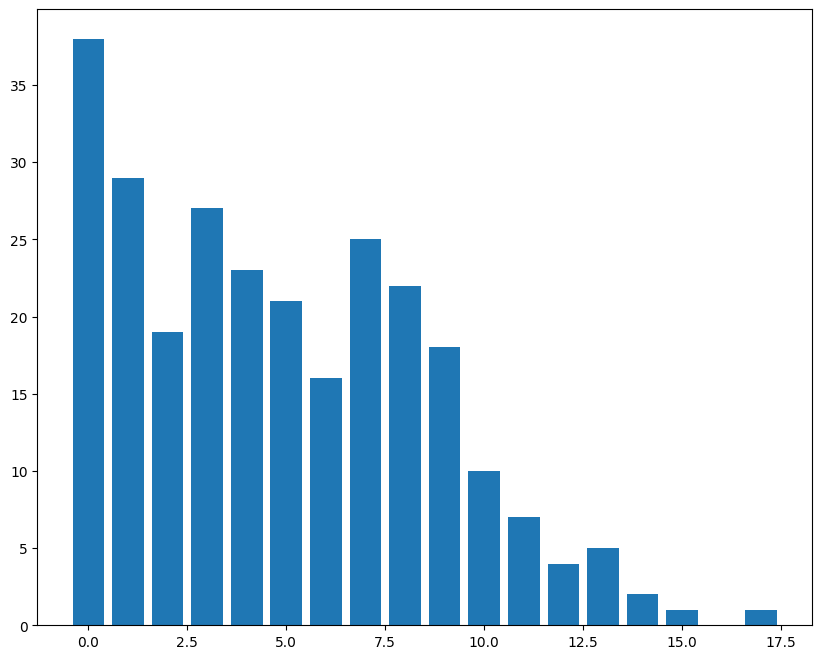

In [ ]:
plt.figure(figsize=(10,8))
plt.bar(diabetes.groupby('Pregnancies')['Outcome'].sum().index, diabetes.groupby('Pregnancies')['Outcome'].sum())
plt.show()

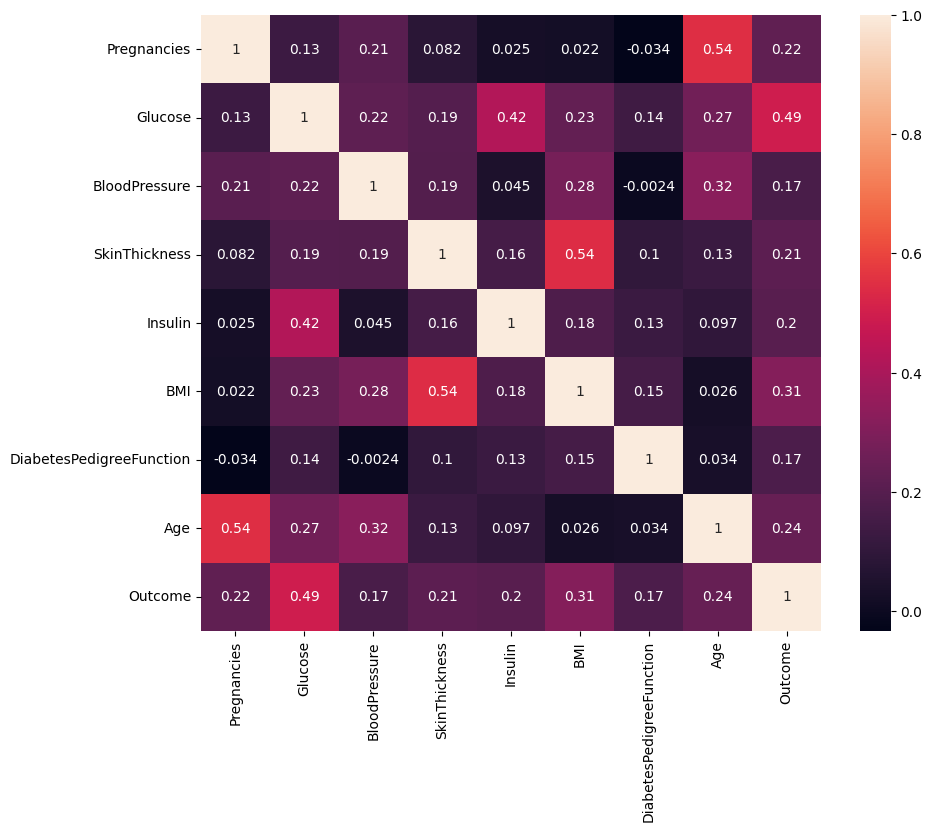

In [ ]:
plt.figure(figsize=(10, 8))
sns.heatmap(diabetes.corr(), annot=True)
plt.show()

In [ ]:
# Identifique los valores atipicos (Outlier)
# ¿Qué es un valor atípico?
# Un valor atípico es un punto de datos en un conjunto de datos que está distante de todas las demás observaciones.

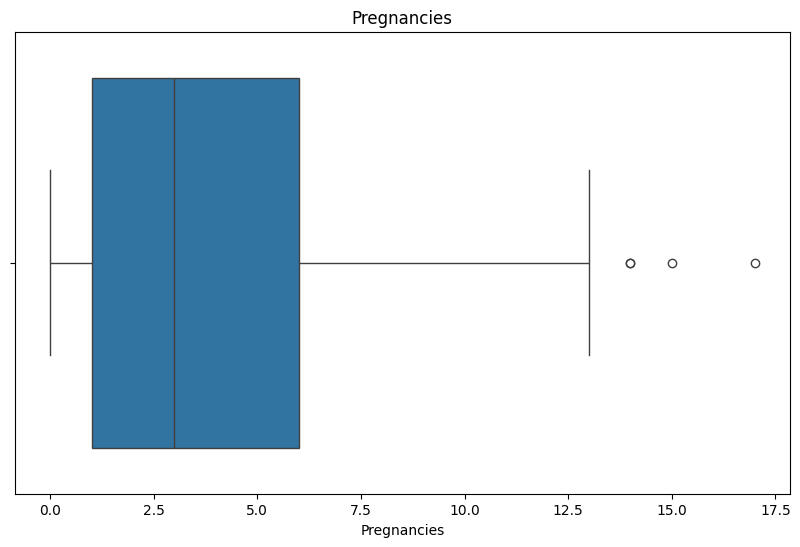

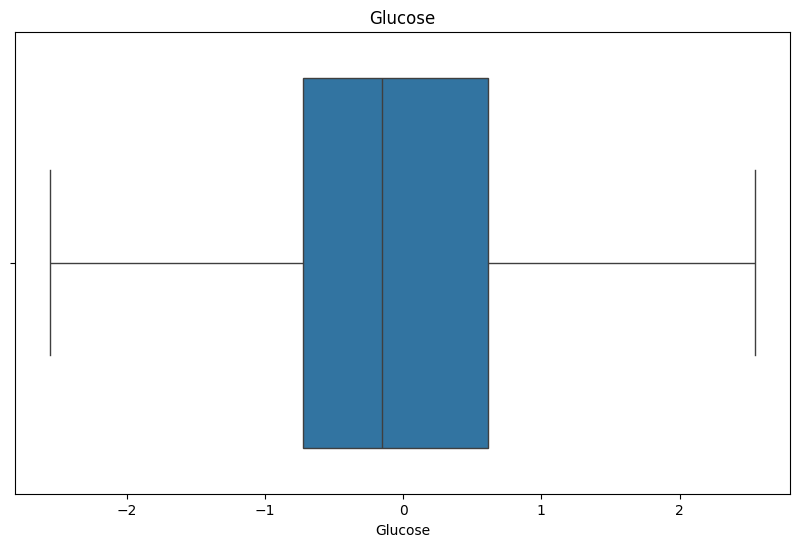

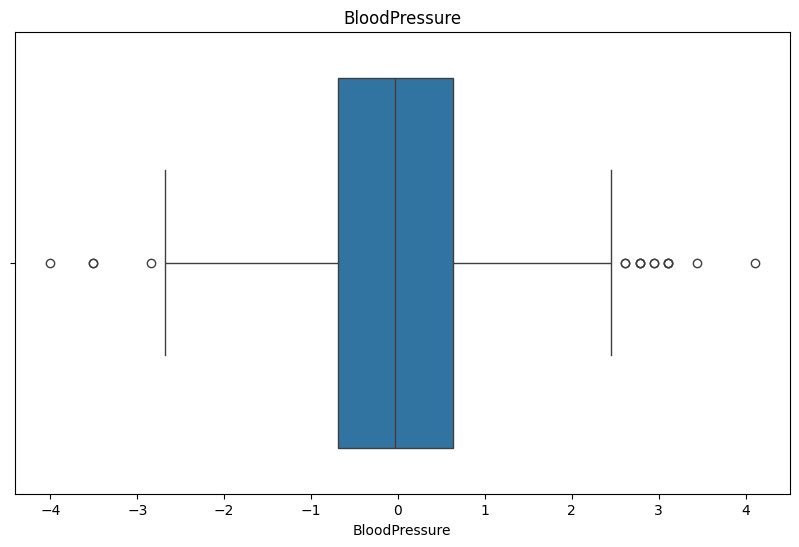

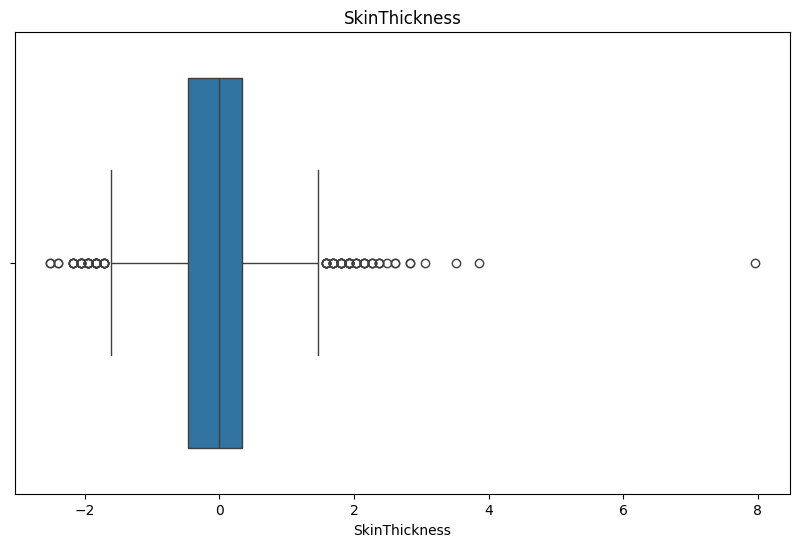

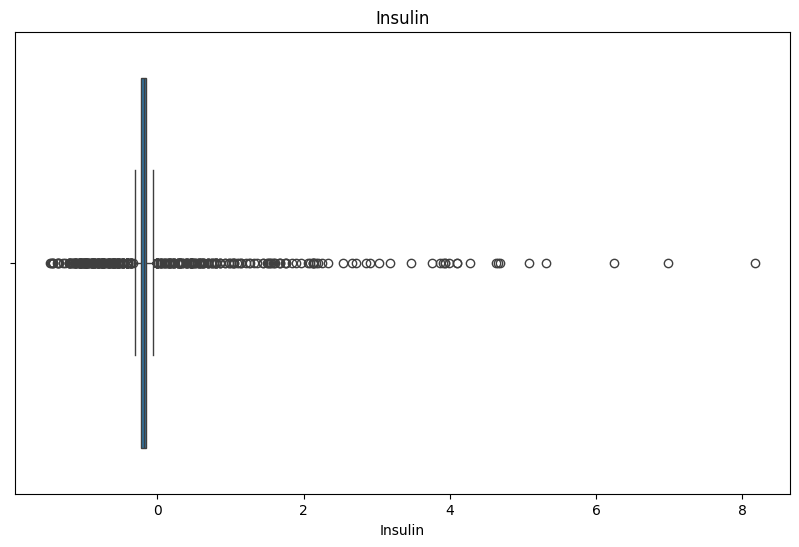

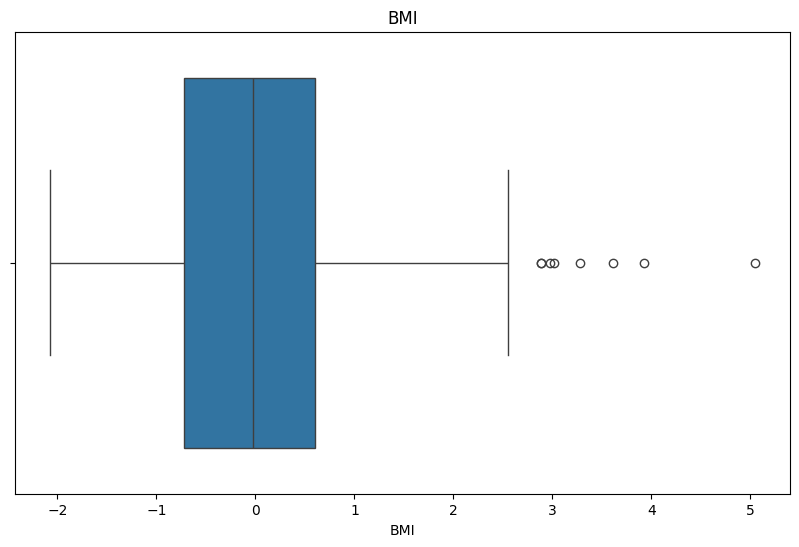

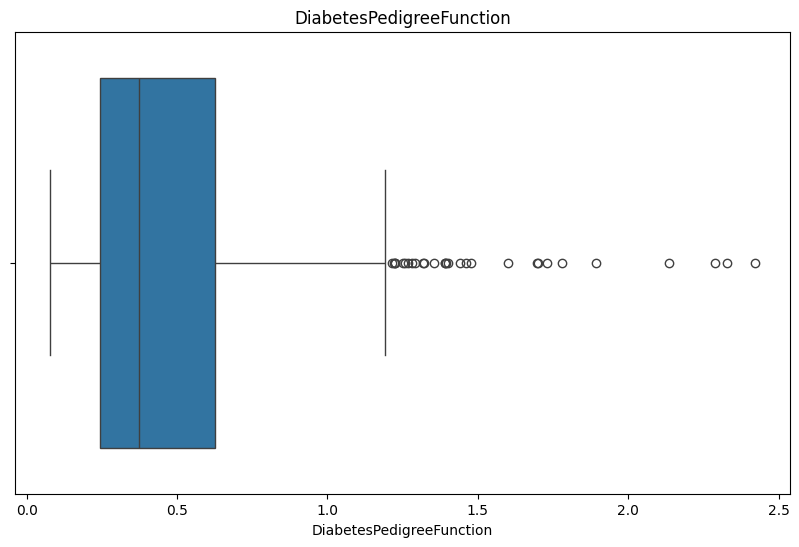

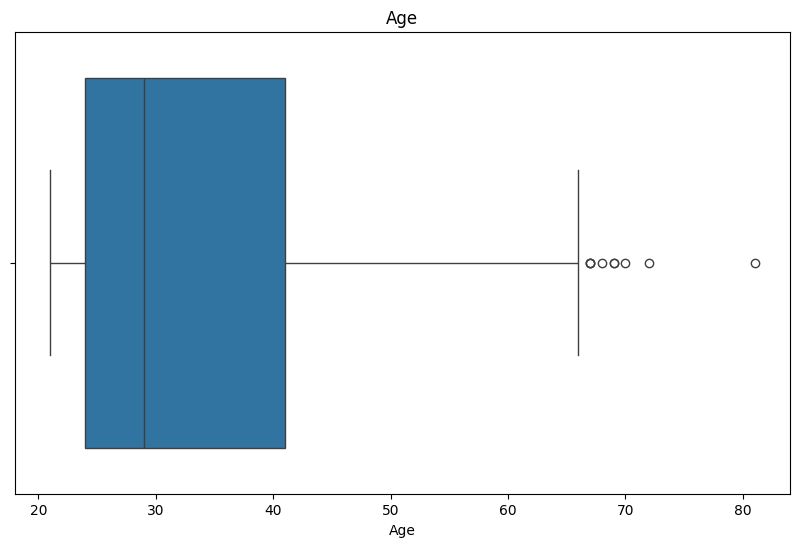

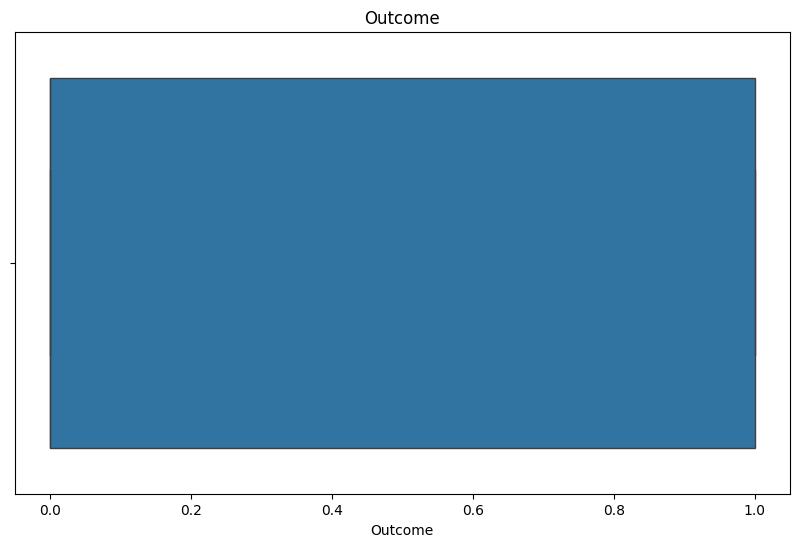

In [ ]:
for column in diabetes.columns:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=diabetes[column])
    plt.title(f'{column}')
    plt.show()

In [ ]:
# Divida la data de prueba y entrenamiento. Continue con los demas paso hasta llegar a las metricas para evaluar el modelo de prediccion

In [ ]:
X = diabetes.drop('Outcome', axis=1)
y = diabetes['Outcome']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [ ]:
print("Datos de entrenamientos X:",X_train.shape)
print("Datos de entrenamientos y:",y_train.shape)

Datos de entrenamientos X: (537, 8)
Datos de entrenamientos y: (537,)


In [ ]:
rfc = RandomForestClassifier(random_state=42)


In [ ]:
rfc.fit(X_train,y_train)

RandomForestClassifier(random_state=42)

In [ ]:
y_pred = rfc.predict(X_test)

In [ ]:
rf_train_score = rfc.score(X_train, y_train)
rf_test_score = rfc.score(X_test, y_test)

print('Rendimiento del modelo en datos de entrenamientos',rf_train_score)
print('Rendimiento del modelo en datos de prueba',rf_test_score)

Rendimiento del modelo en datos de entrenamientos 1.0
Rendimiento del modelo en datos de prueba 0.7489177489177489


In [ ]:
print("Classification report:\n\n", classification_report(y_test,y_pred))

Classification report:

               precision    recall  f1-score   support

           0       0.82      0.79      0.81       151
           1       0.63      0.66      0.65        80

    accuracy                           0.75       231
   macro avg       0.72      0.73      0.73       231
weighted avg       0.75      0.75      0.75       231



In [ ]:
feature_importances = rfc.feature_importances_


In [ ]:
importances_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances}).sort_values(by='Importance', ascending=False)


In [ ]:
importances_df


,Feature,Importance
1,Glucose,0.282923
5,BMI,0.156487
7,Age,0.139748
6,DiabetesPedigreeFunction,0.111282
2,BloodPressure,0.081699
4,Insulin,0.079687
0,Pregnancies,0.078609
3,SkinThickness,0.069565


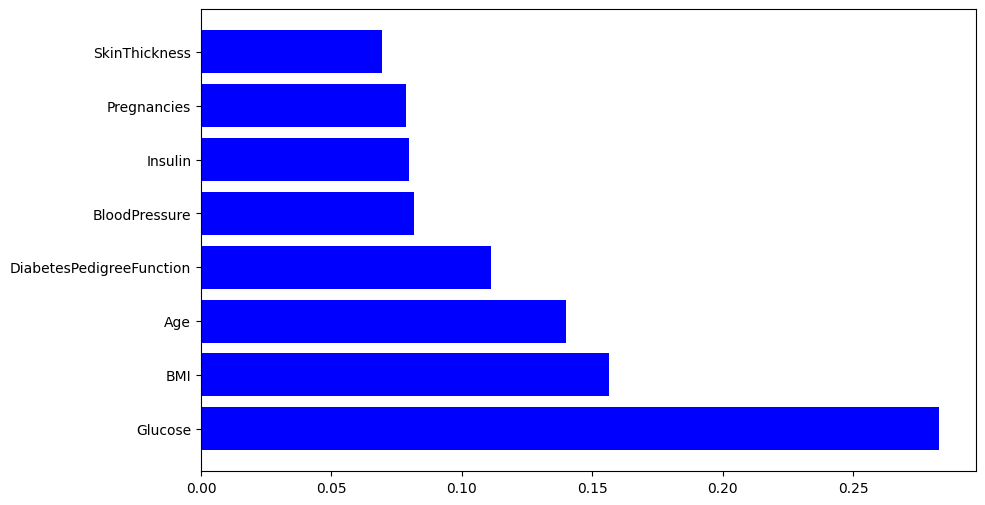

In [ ]:
plt.figure(figsize=(10, 6))
plt.barh(importances_df['Feature'], importances_df['Importance'], color='blue')
plt.show()
